<br>
# Einblick in das Rechnen mit <i>agla</i>

von Holger Böttcher - hbomat@posteo.de
<br><br>
Diese Arbeit steht unter der freien Lizenz [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.de)  

<br><br>
### Komplexaufgabe Cubus hyperbolicus
<br>Das Beispiel beinhaltet die Aufgabe 48 aus
<br><br>
<i>W. Herget, T. Jahnke, W. Kroll<br>
Produktive Aufgaben für den Mathematikunterricht in der Sekundarstufe II<br>
Cornelsen 2011</i>
<br><br><br>
Drei paarweise windschiefe und orthogonale Kanten eines Würfels werden nach beiden <br>
Seiten ins Unendliche verlängert. Diese drei Geraden sollen durch geradlinige Verbin-<br>
dungen miteinander verbunden werden
<br><br>
1.$\,\,$ Entwickeln Sie eine Methode, mit der man systematisch die Befestigungspunkte für<br>
$\quad\,$solche Streben finden kann, und zeichnen Sie ein Schrägbild des Einheitswürfels mit <br>
$\quad\,$mehreren Streben 
<br><br>
2.$\,\,$ Wenn man die Streben ebenso wie die drei Würfelkanten ins Unendliche verlän-<br>
$\quad\,$gert, erhält man  eine Geradenschar. Untersuchen Sie die Schar dieser "Strebgera-<br>
$\quad\,$den" auf ihre Eigenschaften
<br><br>
3.$\,\,$ Die Strebgeraden scheinen chaotisch im Raum verteilt zu sein. Tatsächlich gibt es <br>
$\quad\,$aber eine feste Richtung, die mit jeder Strebgeraden den gleichen Winkel bildet.<br>
$\quad\,$Bestimmen Sie diesen Winkel
<br><br>
$\quad\,$Versuchen Sie, sich ein Bild von der räumlichen Lage der Geradenschar zu <br>
$\quad\,$machen
<br><br>

In [1]:
%run agla/start    # Aktivierung des Paketes

<br>
### Der Würfel

Es wird ein Körper-Objekt erzeugt; ein Körper ist formal über eine Menge von Ecken <br>und eine Menge von Kanten (Verbindungen zwischen den Ecken) definiert

In [2]:
ve = Viereck(v(1, 0, 0), v(0, 1, 0))   # Einfacher Weg zur Erzeu-

In [3]:
p = Prisma(ve, 1)                      # gung eines Würfels

In [4]:
würfel = w = p.in_körper               # als Körper

In [5]:
e = w.ecken; e

[Vektor, Vektor, Vektor, Vektor, Vektor, Vektor, Vektor, Vektor]

In [6]:
w.kanten

### Zu 1:

### Die ausgezeichneten Geraden

In [7]:
g1 = x_achse      # x_achse ist vordefiniert              
g2 = Gerade(e[5], v(0, 1, 0))    
g3 = Gerade(e[3], v(0, 0, 1))   

g1.prg

<IPython.core.display.Math object>

In [8]:
g2.prg

<IPython.core.display.Math object>

In [9]:
g3.prg

<IPython.core.display.Math object>

In [10]:
bb = [o.bild(schrägbild) for o in (w, g1, g2, g3)]

In [11]:
sicht_box(2)         # ein 3D-Bild
zeichne(*bb, box=nein, achsen=nein)

In [12]:
zeichne(w, [g1, 3], [g2, 3, blau], [g3, 3, grün])  

### Befestigungspunkte der Strebgeraden

In [13]:
P = v(x, 0, 0); Q = v(1, y, 1); R = v(0, 1, z)    # Ansatz 
P, Q, R                                          

(Vektorschar([x]), Vektorschar([y]), Vektorschar([z]))

 Eine Bedingung an die Befestigungspunkte ergibt sich daraus, dass sie auf einer <br>
 Geraden liegen sollen, also kollinear sind. Das bedeutet, es gilt 
 $\; \vec{PR} = s \cdot \vec{PQ}\:$ <br>
 mit irgendeinem $s$.  Zur Lösung wird die rechte Seite zum Nullvektor gemacht und <br>
 dann die linke Seite benutzt 

In [14]:
gleichung = v(P, R) - s*v(P, Q)
                                   
löse(gleichung, [x, y, z])       


Offensichtlich gibt es für $s=0\,$ und $s=1\,$ keine Lösung<br>

Die berechneten Punkte sind

In [15]:
P = P.subs(x, s/(s-1)); Q = Q.subs(y, 1/s); R = R.subs(z, s)   
P, Q, R     

(Vektorschar([s]), Vektorschar([s]), Vektorschar([s]))

### Zu 2:

### Die Strebgeradenschar
(für alle $s$ außer $s \in \{0, 1\}$)

In [16]:
# Erzeugung der Geraden auf der Basis von P und Q

streb_gerade = sg = Gerade(P, v(P, Q)) 
sg

In [17]:
sg.prg

<IPython.core.display.Math object>

In [18]:
# Kontrolle durch Einsetzen in die Gleichung: auch R liegt auf 
# allen Geraden der Schar

sg.Prg(R)

<IPython.core.display.Math object>

### Betrachtung von zwei Elementen der Schar

In [19]:
s1, s2, t1, t2 = symbols('s_1, s_2, t_1, t_2')
s1, s2, t1, t2

In [20]:
sg1 = sg.sch_el(s1); sg2 = sg.sch_el(s2)   

# sch_el - Scharelement-Methode

In [21]:
sg1.pkt(t1), sg2.pkt(t2)  

(Vektorschar([s_1, t_1]), Vektorschar([t_2, s_2]))

Anhand dieser allgemeinen Punkte der beiden Scharelemente lassen sich die <br>
Überlegungen von Seite 228 des Buches leicht nachvollziehen: <br><br>
Für einen Schnittpunkt der beiden Geraden muss $t_1=t_2$ gelten ($z$-Komponente), <br>
aus der $y$-Komponente wird $s_1=s_2$ abgeleitet, woraus dann folgt, dass auch die <br>
Gleichungen anhand der $x$-Komponente erfüllt sind - die Geraden müßten identisch<br>
sein; ebenso ist ableitbar, dass unterschiedliche Geraden keinen Schnittpunkt haben

### Kontrollgrafik (Animation)

In [22]:
ber = (-2.7, 0.75)           # ca 8 sec            
zeichne(g1, [g2, blau], [g3, grün], [sg, rot, 2, ber], 
      [P, 2, ber], [Q, 2, blau, ber], [R, 2, grün, ber], 
      achsen=nein, skalen=nein)   

agla: lange Rechenzeit


### Zu 3:

### Berechnung der festen Richtung

In [23]:
rv = v(a, b, c)     # Ansatz für die gesuchte Richtung 

Für einen konstanten Winkel muss das Skalarprodukt der Richtungseinheitsvektoren <br>
der Strebgeraden mit diesem Vektor konstant (gleich irgendeiner Konstanten $k$) sein 

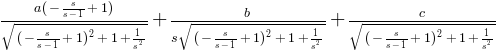

In [24]:
sp = sg.richt.einh_vekt ° rv 
sp

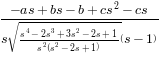

In [25]:
aa = einfach(sp)
aa

In [26]:
n = s^4-2*s^3+3*s^2-2*s+1
n 

Mit 

In [27]:
factor(n)     # SymPy-Anweisungen (factor, collect, ... )
              # wurden nicht eingedeutscht

heben sich Quadrieren und Wurzelziehen auf, im Nenner verbleibt der Ausdruck <br>
in den Klammern: $\;s^2-s+1$<br><br>
Also müssen bei jedem $s$ die Größen

In [28]:
collect(-a*s + b*s - b + c*s^2 - c*s, s), expand(k * (s^2 - s + 1))

gleich sein; der Koeffizientenvergleich zeigt: das ist nur möglich bei

In [29]:
c = k; b = -k; a = -k
a, b, c

(die Werte für $b$ und $c$ sind ablesbar, $a$ ist danach aus $\;-a+b-c = -k\:$
leicht <br>
zu berechnen)<br><br>
Damit ergibt sich für den gesuchten Richtungsvektor

In [30]:
rv = v(-k, -k, k)
rv

Vektorschar([k])

$k$ kann aus ihm eliminiert werden

In [31]:
rv = 1/k * rv
rv

Vektor

### Winkel der Strebgeraden mit diesem Vektor

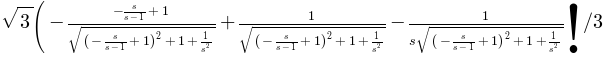

In [32]:
cosdelta = sg.richt.einh_vekt * rv / rv.betrag
cosdelta

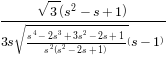

In [33]:
einfach(cosdelta)   # das wird mit den obigen Überlegungen vereinfacht 

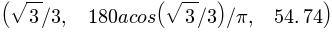

In [34]:
cosdelta = sqrt(3)/3

cosdelta, arccosg(cosdelta), arccosg(cosdelta).n(4)   

# (die verwendete agla-Funktion arccosg berechnet den Winkel in Grad)


### Verhalten der ausgezeichneten Geraden
bei der Rotation um eine der Würfeldiagonalen

In [35]:
diagonale = dg = Gerade(e[2], v(e[2], e[4]))   # Würfeldiagonale
dg.prg

<IPython.core.display.Math object>

In [36]:
abb = drehung(dg, 120)   # Winkel in Grad

In [37]:
identisch(g1.bild(abb), g2), identisch(g2.bild(abb), g3), \
identisch(g3.bild(abb), g1), 

# die Geraden gehen bei einer Drehung um 120° ineinander über


(True, True, True)

### Kontrollgrafik (Animation anhand einer Geraden)
Die gemeinsame Darstellung aller 3 Geraden ist möglich, erfordert aber die <br>
3-fache Rechenzeit<br>

In [38]:
abb = drehung(dg, u)   # u - allgemeiner Winkel

In [39]:
# g2 geht in g3 über; ca 10 sec

ber = 0, 120
zeichne([g2, 2, blau], [g3, 2, grün], [g2.bild(abb), 2, rot, ber], dg)   

agla: lange Rechenzeit


### Untersuchung der Schnittkurve der Strebgeraden mit der <br>Ursprungsebene

In [40]:
E = Ebene(O, rv)    # O ist der Ursprung, rv ist Normalenvektor
E.koord            

In [41]:
S = sg.schnitt(E).einfach   # die Schnittpunktschar 
S

Vektorschar([s])

Eine Grafik lässt vermuten, dass alle Schnittpunkte auf einem Kreis liegen:

In [42]:
ss = [0, 12, 10, 50, 100, 1/2, 1/30, 1/100, -2, -10, -50, -100, 
          -1/2, -1/30, -1/100] 

SS = [ S.sch_el(s) for s in ss ]  # einige Punkte der Schar   

sicht_box(3)      
zeichne(E, *[p for p in SS] )

Nachweis, dass ein Kreis vorliegt und Ermittlung seiner Parameter  

In [43]:
P, Q, R = [S.sch_el(s) for s in (0, 1, -1)]   # 3 Punkte der Kurve
P, Q, R

(Vektor, Vektor, Vektor)

In [44]:
mPQ = Ebene(1/2*(P+Q), v(P, Q))   # 2 Mittelsenkrechte

mQR = Ebene(1/2*(Q+R), v(Q, R))   # (Ebenen)

mPQ.koord, mQR.koord


In [45]:
h = mPQ.schnitt(mQR)   # eine Gerade
M = h.schnitt(E)
M                      # der potentielle Mittelpunkt

Vektor

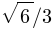

In [46]:
einfach(M.abstand(S))

Alle Punkte der Schar haben den gleichen Abstand zu $M$; damit liegt ein Kreis vor, 
<br>sein Mittelpunkt ist $M$, Radius ist der einheitliche Abstand

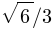

In [47]:
r = M.abstand(P); r

### Untersuchung der Schnittkurve der Strebgeraden mit <br>der allgemeinen Ebene

In [48]:
c = Symbol('c')   # c wurde oben mit einem Wert belegt

E = Ebene(-1, -1, 1, -c)   # Parallele zur obigen Ursprungsebene
E.koord                    

In [49]:
S = sg.schnitt(E); S

Vektorschar([s, c])

In [50]:
E.Koord(S)   # Kontrolle durch Einsetzen, ob alle Punkte S in E liegen

<IPython.core.display.Math object>

Auswahl von drei Kurvenpunkten:

In [51]:
S.subs(s, 1)   # s=1 ist ungeeignet; NaN - not a number

Vektor

In [52]:
P, Q, R = [S.subs(s, t) for t in (0, 2, -1)]

P, Q, R


(Vektorschar([c]), Vektorschar([c]), Vektorschar([c]))

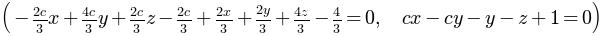

In [53]:
mPQ = Ebene(1/2*(P+Q), v(P, Q))   # 2 Mittelsenkrechte

mQR = Ebene(1/2*(Q+R), v(Q, R))   # (Ebenen)

mPQ.koord,  mQR.koord


In [54]:
h = mPQ.schnitt(mQR)
h

In [55]:
h.prg

<IPython.core.display.Math object>

In [56]:
M = E.schnitt(h).einfach    # der (potentielle) Mittelpunkt des Kreises
M

Vektorschar([c])

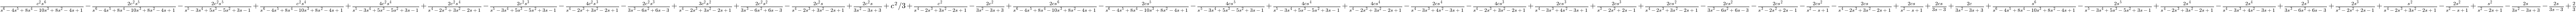

In [57]:
aa = S.abstand(M)^2   # das Quadrat läßt sich besser behandeln
aa                    

Der Ausdruck ist sehr komplex, er läßt sich jedoch problemlos vereinfachen;
 <br>darüberhinaus hängt er nicht von $s$ ab:

In [58]:
rr = einfach(aa); rr

In [59]:
rr = factor(rr); rr

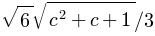

In [60]:
r = sqrt(rr); r

In [61]:
einfach(S.abstand(M)^2 - r^2)  # Kontrolle

Der ermittelte Wert gilt somit für alle $s$. Damit ist nachgewiesen, dass
auch im <br>
allgemeinen Fall ein Kreis vorliegt, er hat den Mittelpunkt $M$ und den Radius $r$, <br>
seine Trägerebene ist $E$

In [62]:
k = Kreis(E, M, r); k

In [63]:
k.M, k.r

⎛                        ____________⎞
⎜                       ╱  2         ⎟
⎜                  √6⋅╲╱  c  + c + 1 ⎟
⎜Vektorschar([c]), ──────────────────⎟
⎝                          3         ⎠

### Ortskurve der Kreismittelpunkte

In [64]:
ok = Gerade(k.M)
ok.prg

<IPython.core.display.Math object>

In [65]:
identisch(ok, dg)   # sie ist die Würfeldiagonale

True

### Kontrollgrafik mit einigen Kreisen

In [66]:
cc = [-i*0.5 for i in range(8)] + [i*0.5 for i in range(8)]

In [67]:
K = [k.sch_el(c) for c in cc]

In [68]:
zeichne([dg, 2], *K, skalen=nein)

### Eine Animation

Die über die Kreisschar erzeugte Fläche ist ein Hyperboloid; es wird sichtbar gemacht, <br>
dass die ausgezeichneten Geraden zu seinen Erzeugenden gehören
<br>

In [69]:
# Der allgemeine Punkt der Fläche mit den Parametern c (für das 
# Element der Kreisschar) und t (für den Kreispunkt; Winkel in Grad)

k.pkt(t)

Vektorschar([t, c])

In [70]:
ff = Fläche(k.pkt(t), (t, 0, 360), (c, -3, 3))

In [71]:
abb   # oben definiert

In [72]:
ber = (u, 0, 360)

zeichne([ff, gelb],                     # ca. 10 sec für eine Gerade,
        [g1.bild(abb), 2, rot, ber],    # ca. 30 sec für alle drei
        [g2.bild(abb), 2, grün, ber],   
        [g3.bild(abb), 2, blau, ber],
        achsen=nein, box=nein)

agla: lange Rechenzeit
agla: lange Rechenzeit
agla: lange Rechenzeit
